In [1]:
import numpy as np
import scipy.io

import matplotlib.pyplot as plt

In [2]:
raw_data = scipy.io.loadmat(f'data/delta_emle_total.mat', squeeze_me=True)
data = {k: v for k, v in raw_data.items() if hasattr(v, 'shape')}

In [3]:
E_total_dft = data['E_static_dft'] + data['E_induced_dft']
E_total_emle = data['E_static_emle'] + data['E_induced_emle']

In [4]:
def rmse(a, b):
    return np.sqrt(np.mean((a-b)**2))

err_static = rmse(E_total_dft, data['E_static_emle'])
err_total = rmse(E_total_dft, E_total_emle)

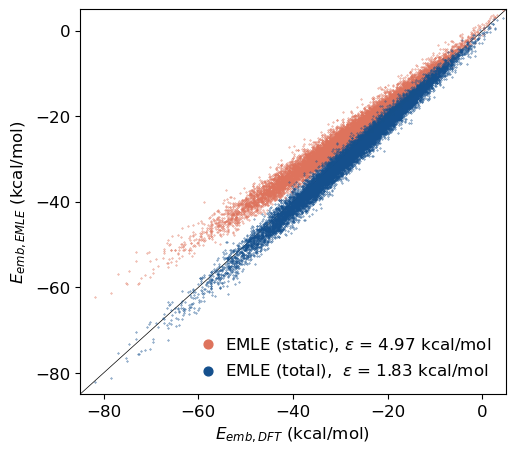

In [5]:
BLUE = "#15508d"
RED = "#de735c"

ticks = np.arange(-80, 10, 20)

plt.rc('figure', facecolor='w')
plt.rc('font', size=12)

fig, ax = plt.subplots(figsize=(5.5, 5))
ax.scatter(E_total_dft, data['E_static_emle'], s=0.1, 
            label=f'EMLE (static), $\epsilon$ = {err_static:4.2f} kcal/mol', c=RED)
ax.scatter(E_total_dft, E_total_emle, s=0.1, 
            label=f'EMLE (total),  $\epsilon$ = {err_total:4.2f} kcal/mol', c=BLUE)
ax.plot([-85, 5], [-85, 5], c='black', linewidth=0.5, zorder=-2)
ax.set_xlim([-85,5])
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_ylim([-85,5])
ax.set_xlabel('$E_{emb, DFT}$ (kcal/mol)')
ax.set_ylabel('$E_{emb, EMLE}$ (kcal/mol)')
plt.legend(markerscale=20, loc='lower right', frameon=False, handletextpad=0.)
plt.savefig('Fig4.png', dpi=300, bbox_inches='tight')
plt.show()